In [2]:
!pip install --quiet git+https://github.com/EddyEdzwan/StopFAIke.git

     |████████████████████████████████| 141 kB 5.2 MB/s 
     |████████████████████████████████| 73 kB 1.6 MB/s 
     |████████████████████████████████| 185 kB 17.3 MB/s 
     |████████████████████████████████| 14.4 MB 61 kB/s 
     |████████████████████████████████| 87 kB 5.0 MB/s 
     |████████████████████████████████| 722 kB 44.3 MB/s 
     |████████████████████████████████| 743 kB 37.6 MB/s 
     |████████████████████████████████| 68 kB 6.7 MB/s 
     |████████████████████████████████| 41 kB 557 kB/s 
     |████████████████████████████████| 1.3 MB 41.3 MB/s 
     |████████████████████████████████| 118 kB 40.2 MB/s 
     |████████████████████████████████| 142 kB 43.4 MB/s 
     |████████████████████████████████| 294 kB 36.8 MB/s 
     |████████████████████████████████| 636 kB 42.1 MB/s 
     |████████████████████████████████| 79 kB 6.5 MB/s 
     |████████████████████████████████| 56 kB 3.8 MB/s 
     |████████████████████████████████| 146 kB 47.0 MB/s 
     |██████████████████████

In [38]:
  import nltk
  nltk.download('punkt')
  nltk.download('stopwords')
  nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
# from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
import json
import numpy as np
# import nltk
# import string
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
from StopFAIke import data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Exploration

## FakeNewsNet

### Getting the Dataset

In [ ]:
root = '/home/eddyedzwan/code/EddyEdzwan/FakeNewsNet/code/fakenewsnet_dataset/politifact/fake'
dir_ = os.listdir(root)

#Printing the content of a JSON file download for preview
for folder in dir_:
    f = open(os.path.join(root,folder,'news content.json'))
    data = json.load(f)
    print(json.dumps(data, indent=4, sort_keys=True))
    break

{
    "authors": [],
    "canonical_link": "https://web.archive.org/web/20180624033812/http://flashnewss.club/2018/06/11/breaking-shep-smith-to-be-canned-because-he-cant-control-his-hate-for-donald-trump/",
    "images": [
        "https://web.archive.org/web/20180624033812im_/http://flashnewss.club/wp-content/uploads/2018/06/Screenshot_20180617-0102212-80x80.png",
        "https://web.archive.org/web/20180624033812im_/http://flashnewss.club/wp-content/uploads/2018/06/news_m-2.jpg",
        "https://web.archive.org/web/20180624033812im_/http://flashnewss.club/wp-content/uploads/2018/06/80de7608-53f0-460c-8947-b5a7d76720d2-400x240.jpg",
        "https://web.archive.org/web/20180624033812im_/http://flashnewss.club/wp-content/uploads/2018/06/20-24-400x240.png",
        "https://web.archive.org/web/20180624033812im_/http://flashnewss.club/wp-content/uploads/2018/06/few.jpg",
        "https://web.archive.org/web/20180624033812im_/http://2.gravatar.com/avatar/57f977b92bc08c494494dc40ed0ae92b

In [17]:
#Exporting the DataFrames to csv files
# poli_fake_df.to_csv('/home/eddyedzwan/code/EddyEdzwan/StopFAIke/raw_data/poli_fake_df.csv')
# poli_real_df.to_csv('/home/eddyedzwan/code/EddyEdzwan/StopFAIke/raw_data/poli_real_df.csv')
# gossip_fake_df.to_csv('/home/eddyedzwan/code/EddyEdzwan/StopFAIke/raw_data/gossip_fake_df.csv')
# gossip_real_df.to_csv('/home/eddyedzwan/code/EddyEdzwan/StopFAIke/raw_data/gossip_real_df.csv')

#Reading the csv from local
poli_fake_df = pd.read_csv('https://storage.googleapis.com/stopfaike_eddy/data/poli_fake_df.csv', index_col='Unnamed: 0')
poli_real_df = pd.read_csv('https://storage.googleapis.com/stopfaike_eddy/data/poli_real_df.csv', index_col='Unnamed: 0')
gossip_fake_df = pd.read_csv('https://storage.googleapis.com/stopfaike_eddy/data/gossip_fake_df.csv', index_col='Unnamed: 0')
gossip_real_df = pd.read_csv('https://storage.googleapis.com/stopfaike_eddy/data/gossip_real_df.csv', index_col='Unnamed: 0')

In [18]:
print(f'poli_fake_df shape : {poli_fake_df.shape}')
print(f'poli_real_df shape : {poli_real_df.shape}')
print(f'gossip_fake_df shape : {gossip_fake_df.shape}')
print(f'gossip_real_df shape : {gossip_real_df.shape}')

poli_fake_df shape : (397, 5)
poli_real_df shape : (558, 5)
gossip_fake_df shape : (4892, 5)
gossip_real_df shape : (15271, 5)


In [19]:
#Add target columns
poli_fake_df['target'] = 1
poli_real_df['target'] = 0
gossip_fake_df['target'] = 1
gossip_real_df['target'] = 0

In [20]:
poli_fake_df.shape[0] + poli_real_df.shape[0] + gossip_fake_df.shape[0] + gossip_real_df.shape[0]

21118

In [21]:
df = pd.concat([poli_fake_df,poli_real_df,gossip_fake_df,gossip_real_df], axis=0)

df.shape

(21118, 6)

### Data Cleaning and Preparation (Dealing with missing values/imputing in the dataframes)

In [22]:
#Creating column for string lengths to check and confirm for missing values
for col in df.select_dtypes(include='object').columns:
    df[f'{col}_len'] = df[col].apply(lambda x: len(str(x)))
    
df.head()

,title,text,authors,num_images,url,target,title_len,text_len,authors_len,url_len
0,BREAKING: Shep Smith To Be Canned Because He C...,A dispute in Angela Merkel’s coalition over mi...,[],25,https://web.archive.org/web/20180615125007/htt...,1,84,4901,2,149
1,"CNN Shocks America, FIRES ‘Journalist’ Who Mad...","On Sunday, CNN did something shocking: they to...","['About Janet Farrow', 'Janet Farrow Is An Inv...",5,https://web.archive.org/web/20180502181153/htt...,1,74,1391,209,153
2,"Nancy Pelosi Suffers Breakdown, Taken From Cap...",It’s not a good day for Democrats.\n\nDemocrat...,"['About Truth Dealer', 'Truth Dealer Is A Cons...",52,https://web.archive.org/web/20170616181605/htt...,1,70,1084,121,141
3,Libtard Hero Al Franken Forced To Resign In Di...,Libtard Democrat Al Franken will resign his se...,['Please Enter Your Name Here'],10,https://web.archive.org/web/20170619144927/htt...,1,52,1247,31,128
4,Bill Gates: “I think Donald Trump will go down...,Please Support Online Petition To Congress For...,[],15,https://web.archive.org/web/20170205045142/htt...,1,111,867,2,175


In [23]:
df.isnull().sum()

title          234
text           548
authors          0
num_images       0
url              0
target           0
title_len        0
text_len         0
authors_len      0
url_len          0
dtype: int64

In [24]:
df.min()

authors        ["Amanda N'Duka Anthony D'Alessandro", "Amanda...
num_images                                                     0
url            1037theq.iheart.com/content/2017-07-28-miranda...
target                                                         0
title_len                                                      3
text_len                                                       3
authors_len                                                    2
url_len                                                       11
dtype: object

In [25]:
df[df['title_len']==df['title_len'].min()].shape

(239, 10)

In [26]:
df[df['text_len']==df['text_len'].min()].shape

(548, 10)

In [27]:
#Dropping missing rows
df.dropna(axis=0, how='any', inplace=True)

In [28]:
df.min()

title          "13 Reasons Why" premiere party canceled after...
text           \n\n\n\n\n\n\n\n\n\nReality TV ‘Rob & Big’ sta...
authors        ["Amanda N'Duka Anthony D'Alessandro", "Amanda...
num_images                                                     0
url            1037theq.iheart.com/content/2017-07-28-miranda...
target                                                         0
title_len                                                      3
text_len                                                      17
authors_len                                                    2
url_len                                                       11
dtype: object

In [29]:
df[df['title_len']==df['title_len'].min()]

,title,text,authors,num_images,url,target,title_len,text_len,authors_len,url_len
5570,404,404\n\nSomething went wrong please try again,[],3,https://web.archive.org/web/20200110072426/htt...,0,3,42,2,125
13078,TMZ,Jennifer Lopez is at the center of a pretty ch...,[],74,http://www.tmz.com/,0,3,1438,2,19


In [ ]:
df.drop(index=5570, inplace=True)

In [39]:
#Apply the standard clean function on text column for preprocessing
df['title_preprocessed_lemmatized'] = df['title'].apply(data.clean)
df['text_preprocessed_lemmatized'] = df['text'].apply(data.clean)
df['title_preprocessed_joined'] = df['title_preprocessed_lemmatized']. \
                                                apply(lambda x: ' '.join(word for word in x))
df['text_preprocessed_joined'] = df['text_preprocessed_lemmatized']. \
                                                apply(lambda x: ' '.join(word for word in x))

df.head()

,title,text,authors,num_images,url,target,title_len,text_len,authors_len,url_len,title_preprocessed_lemmatized,text_preprocessed_lemmatized,title_preprocessed_joined,text_preprocessed_joined
0,BREAKING: Shep Smith To Be Canned Because He C...,A dispute in Angela Merkel’s coalition over mi...,[],25,https://web.archive.org/web/20180615125007/htt...,1,84,4901,2,149,"[breaking, shep, smith, canned, control, hate,...","[dispute, angela, merkel, coalition, migration...",breaking shep smith canned control hate donald...,dispute angela merkel coalition migration poli...
1,"CNN Shocks America, FIRES ‘Journalist’ Who Mad...","On Sunday, CNN did something shocking: they to...","['About Janet Farrow', 'Janet Farrow Is An Inv...",5,https://web.archive.org/web/20180502181153/htt...,1,74,1391,209,153,"[cnn, shock, america, fire, journalist, made, ...","[sunday, cnn, something, shocking, took, accou...",cnn shock america fire journalist made fun sar...,sunday cnn something shocking took accountabil...
2,"Nancy Pelosi Suffers Breakdown, Taken From Cap...",It’s not a good day for Democrats.\n\nDemocrat...,"['About Truth Dealer', 'Truth Dealer Is A Cons...",52,https://web.archive.org/web/20170616181605/htt...,1,70,1084,121,141,"[nancy, pelosi, suffers, breakdown, taken, cap...","[good, day, democrat, democrat, house, minorit...",nancy pelosi suffers breakdown taken capitol h...,good day democrat democrat house minority lead...
3,Libtard Hero Al Franken Forced To Resign In Di...,Libtard Democrat Al Franken will resign his se...,['Please Enter Your Name Here'],10,https://web.archive.org/web/20170619144927/htt...,1,52,1247,31,128,"[libtard, hero, al, franken, forced, resign, d...","[libtard, democrat, al, franken, resign, seat,...",libtard hero al franken forced resign disgrace,libtard democrat al franken resign seat u sena...
4,Bill Gates: “I think Donald Trump will go down...,Please Support Online Petition To Congress For...,[],15,https://web.archive.org/web/20170205045142/htt...,1,111,867,2,175,"[bill, gate, think, donald, trump, go, history...","[please, support, online, petition, congress, ...",bill gate think donald trump go history one gr...,please support online petition congress bannin...


In [40]:
df.shape

(20478, 14)

### Creating the model - Only on the content of the article

In [41]:
y = df.pop('target')
X = df

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [42]:
X_train.head()

,title,text,authors,num_images,url,title_len,text_len,authors_len,url_len,title_preprocessed_lemmatized,text_preprocessed_lemmatized,title_preprocessed_joined,text_preprocessed_joined
11229,Nicole Kidman,"Australian actress, singer and producer\n\nNic...",[],19,https://en.wikipedia.org/wiki/Nicole_Kidman,13,43064,2,43,"[nicole, kidman]","[australian, actress, singer, producer, nicole...",nicole kidman,australian actress singer producer nicole mary...
6982,Corinne Olympios and DeMario Jackson at Hallow...,The outing comes three weeks after DeMario Jac...,['Jen Juneau'],10,https://people.com/tv/corinne-olympios-demario...,55,2105,14,88,"[corinne, olympios, demario, jackson, hallowee...","[outing, come, three, week, demario, jackson, ...",corinne olympios demario jackson halloween party,outing come three week demario jackson opened ...
1739,Kim Kardashian’s extreme 700 calorie diet to l...,Kim Kardashian is said to have undergone an ex...,[],28,evoke.ie/2017/07/25/showbiz/gossip/kim-kardash...,72,1805,2,75,"[kim, kardashian, extreme, calorie, diet, lose...","[kim, kardashian, said, undergone, extreme, ca...",kim kardashian extreme calorie diet lose weigh...,kim kardashian said undergone extreme calorie ...
10875,‘Wizards of Waverly Place’ Star David Henrie I...,A fairy tale beginning! Wizards of Waverly Pla...,['Joyce Chen'],7,https://www.usmagazine.com/celebrity-news/news...,55,1731,14,109,"[wizard, waverly, place, star, david, henrie, ...","[fairy, tale, beginning, wizard, waverly, plac...",wizard waverly place star david henrie married,fairy tale beginning wizard waverly place star...
101,"Meghan Markle Reportedly Feuds With ‘furious, ...",Meghan Markle has gone from being portrayed as...,[],11,https://web.archive.org/web/20171226021047/htt...,98,2918,2,168,"[meghan, markle, reportedly, feud, furious, je...","[meghan, markle, gone, portrayed, another, one...",meghan markle reportedly feud furious jealous ...,meghan markle gone portrayed another one princ...


In [43]:
#Instantiating, fitting the vectorizer and transforming the inputs
tf_idf_vectorizer = TfidfVectorizer()

text_train = tf_idf_vectorizer.fit_transform(X_train['text_preprocessed_joined'])

text_test = tf_idf_vectorizer.transform(X_test['text_preprocessed_joined'])

In [44]:
#Instanciating a model
nb_model = MultinomialNB()

#Cross validate the model
cv_score = cross_validate(nb_model, X=text_train, y=y_train, scoring='accuracy', cv=5)

cv_score['test_score'].mean()

0.7674758440672075

In [45]:
#Fitting the model
nb_model.fit(text_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [65]:
#Scoring the predictions
nb_model.score(text_test, y_test)

0.7638346354166666

In [66]:
recall_score(y_test, nb_model.predict(text_test))

0.07115384615384615

### Tuning the model - for content only model

In [51]:
pipe = Pipeline([
    ('tf_idf', TfidfVectorizer()),
    ('nb_model', MultinomialNB())
])

In [53]:
grid_params = {'tf_idf__ngram_range': [(1,1), (2,2)],
              'nb_model__alpha': [0.1, 0.5, 1]}

search_results = GridSearchCV(pipe, param_grid=grid_params, scoring='accuracy', n_jobs=-1, cv=5)

search_results.fit(X_train['text_preprocessed_joined'], y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tf_idf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        

In [54]:
search_results.best_score_

0.8405885389752875

In [55]:
search_results.best_params_

{'nb_model__alpha': 0.1, 'tf_idf__ngram_range': (1, 1)}

In [57]:
search_results.best_estimator_.score(X_test['text_preprocessed_joined'], y_test)

0.8387044270833334

In [59]:
from sklearn.metrics import recall_score, precision_score

In [62]:
recall_score(y_test, search_results.best_estimator_.predict(X_test['text_preprocessed_joined']))

0.44487179487179485

In [67]:
grid_params = {'tf_idf__ngram_range': [(1,1), (2,2)],
              'nb_model__alpha': [0.05, 0.1, 0.2, 0.3]}

search_results = GridSearchCV(pipe, param_grid=grid_params, scoring='recall', n_jobs=-1, cv=5)

search_results.fit(X_train['text_preprocessed_joined'], y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tf_idf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        

In [68]:
search_results.best_score_

0.49536339069833596

In [70]:
search_results.best_params_

{'nb_model__alpha': 0.05, 'tf_idf__ngram_range': (1, 1)}

In [71]:
recall_score(y_test, search_results.best_estimator_.predict(X_test['text_preprocessed_joined']))

0.5096153846153846

In [87]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve
import matplotlib.pyplot as plt

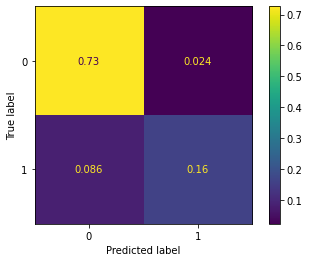

In [85]:
plot_confusion_matrix(search_results.best_estimator_, X['text_preprocessed_joined'], y, normalize='all')

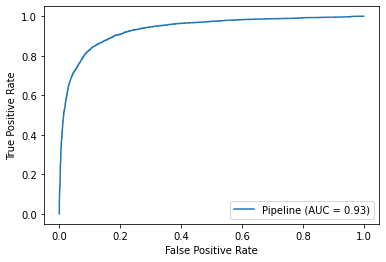

In [86]:
plot_roc_curve(search_results.best_estimator_, X['text_preprocessed_joined'], y)

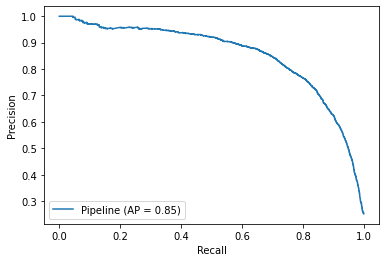

In [88]:
plot_precision_recall_curve(search_results.best_estimator_, X['text_preprocessed_joined'], y)

In [90]:
precision, recall, threshold = precision_recall_curve(y, search_results.best_estimator_.predict_proba(X['text_preprocessed_joined'])[:,1])

In [104]:
np.where(recall>0.8)

(array([    0,     1,     2, ..., 13416, 13417, 13418]),)

In [105]:
best_threshold_index = np.where(precision == precision[np.where(recall>0.8)].max())

In [109]:
custom_threshold = threshold[best_threshold_index][0]

In [111]:
custom_threshold

0.2733414224516452

In [118]:
X.shape

(20478, 13)

In [116]:
search_results.best_estimator_.predict_proba(X['text_preprocessed_joined'])

custom_prediction = []

for positive_prediction in search_results.best_estimator_.predict_proba(X['text_preprocessed_joined'])[:, 1]:
  if positive_prediction > custom_threshold:
    custom_prediction.append(1)
  else:
    custom_prediction.append(0)

len(custom_prediction)

20478

In [119]:
recall_score(y, custom_prediction)

0.79968731678718

In [121]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy_score(y, custom_prediction)

0.889246996777029

### Creating the model - Only on the title of the article

In [74]:
#Instantiating, fitting the vectorizer and transforming the inputs
tf_idf_vectorizer = TfidfVectorizer()

title_train = tf_idf_vectorizer.fit_transform(X_train['title_preprocessed_joined'])

title_test = tf_idf_vectorizer.transform(X_test['title_preprocessed_joined'])

In [75]:
#Instanciating a model
nb_model = MultinomialNB()

#Cross validate the model
cv_score = cross_validate(nb_model, X=title_train, y=y_train, scoring='accuracy', cv=5)

cv_score['test_score'].mean()

0.8087762154273271

In [76]:
#Fitting the model
nb_model.fit(title_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [77]:
#Scoring the predictions
nb_model.score(title_test, y_test)

0.8076171875

In [78]:
recall_score(y_test, nb_model.predict(title_test))


0.2980769230769231

### Extra

In [ ]:
def get_data(directory):
    '''Function to read news content in given directory using the FakeNewsNet dataset'''
    dictlist = []
    
    #Only get the following columns from the dataset
    cols = ['title','text','authors','num_images','url']
    
    folders = glob.glob(directory+'/*')
    for index, subdir in enumerate(folders):
        file_path = glob.glob(subdir+'/*')
        file_path.sort()
        #check if glob returned a valid file path (non-empty list)
        if len(file_path) >= 1 and file_path[0][-4:]=='json':
            file = open(file_path[0]).read()
            jsondata = json.loads(file)
            dictlist.append(scaledict(jsondata))
    
    return pd.DataFrame(dictlist,columns=cols)

def scaledict(ajson):
    '''Function to process json pulled from FakeNewsNet'''
    thedict = {'url':ajson['url'],'title':ajson['title'],'text':ajson['text'],'num_images':len(ajson['images']),'authors':str(ajson['authors'])}
#     ext = tldextract.extract(ajson['url'])
#     thedict['domain'] = ext.domain
    return thedict

In [ ]:
#Running the get_data function for the FakeNewsNet dataset and creating individual DataFrames
poli_fake = '/home/eddyedzwan/code/EddyEdzwan/FakeNewsNet/code/fakenewsnet_dataset/politifact/fake'
poli_real = '/home/eddyedzwan/code/EddyEdzwan/FakeNewsNet/code/fakenewsnet_dataset/politifact/real'
gossip_fake = '/home/eddyedzwan/code/EddyEdzwan/FakeNewsNet/code/fakenewsnet_dataset_2/gossipcop/fake'
gossip_real = '/home/eddyedzwan/code/EddyEdzwan/FakeNewsNet/code/fakenewsnet_dataset_2/gossipcop/real'


poli_fake_df = get_data(poli_fake)
poli_real_df = get_data(poli_real)
gossip_fake_df = get_data(gossip_fake)
gossip_real_df = get_data(gossip_real)

In [ ]:
def preprocess_text(series):
    '''function to preprocess textual data provided'''
    #Lowercase
    series = series.apply(lambda x: x.lower())
    
    #removing numbers
    series = series.apply(lambda x: ' '.join(word for word in word_tokenize(x) if not word.isdigit()))
    
    #removing punctuations
    punctuation_list = string.punctuation
    punctuation_list += '“”‘’'
    for punctuation in punctuation_list:
        series = series.apply(lambda x: x.replace(punctuation, ''))
    
    #removing stopwords
    stop_words = set(stopwords.words('english'))
    series = series.apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))
    
    #lemmatizing
    lemmatizer = WordNetLemmatizer()
    series = series.apply(lambda x: ' '.join(lemmatizer.lemmatize(word) for word in word_tokenize(x)))
    
    return series

## Liar Dataset (TBC - Does not contain the data we need, can be placed aside)

In [ ]:
dataset = load_dataset('liar')

dataset

Using custom data configuration default
Reusing dataset liar (/home/eddyedzwan/.cache/huggingface/datasets/liar/default/1.0.0/479463e757b7991eed50ffa7504d7788d6218631a484442e2098dabbf3b44514)


DatasetDict({
    train: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 10269
    })
    test: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1283
    })
    validation: Dataset({
        features: ['id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state_info', 'party_affiliation', 'barely_true_counts', 'false_counts', 'half_true_counts', 'mostly_true_counts', 'pants_on_fire_counts', 'context'],
        num_rows: 1284
    })
})

In [ ]:
X_train = pd.DataFrame(dataset['train'])
X_valid = pd.DataFrame(dataset['validation'])
X_test = pd.DataFrame(dataset['test'])

X_train.head()

,id,label,statement,subject,speaker,job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,2635.json,0,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,1,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,2,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,0,Health care reform legislation is likely to ma...,health-care,blog-posting,,,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,1,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN
